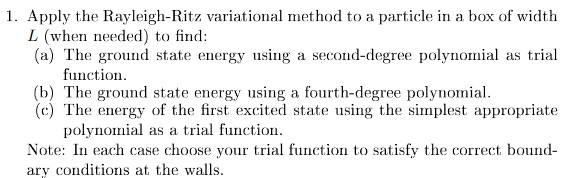

In [1]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
from matplotlib.animation import FuncAnimation
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd
from scipy.integrate import quad
from scipy.linalg import eigh

style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 2):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

In [2]:
# define symbols
x, L, alpha = sp.symbols('x L alpha', real=True, positive=True)
hbar, m = sp.symbols('hbar m', positive=True)
#part a for trial function
psi_a = x * (L - x)
norm_sq_a = sp.integrate(psi_a**2, (x, 0, L))
N_a_sq = 1 / norm_sq_a
N_a = sp.sqrt(N_a_sq)
psi_a_norm = N_a * psi_a

d2_psi_a = sp.diff(psi_a_norm, x, 2)
H_psi_a = - (hbar**2 / (2*m)) * d2_psi_a
E_a = sp.integrate(psi_a_norm * H_psi_a, (x, 0, L))

print('psi, norm squared, dervativers of psi and H below\n')
display(psi_a, norm_sq_a,N_a,psi_a_norm,d2_psi_a,H_psi_a)
print('The energy value calculated for part a is: \n')
display(E_a)

psi, norm squared, dervativers of psi and H below



x*(L - x)

L**5/30

sqrt(30)/L**(5/2)

sqrt(30)*x*(L - x)/L**(5/2)

-2*sqrt(30)/L**(5/2)

sqrt(30)*hbar**2/(L**(5/2)*m)

The energy value calculated for part a is: 



5*hbar**2/(L**2*m)

In [3]:
psi_b = x * (L - x) * (1 + alpha * x)
norm_sq_b = sp.integrate(psi_b**2, (x, 0, L))
d2_psi_b = sp.diff(psi_b, x, 2)
H_psi_b = - (hbar**2 / (2*m)) * d2_psi_b
numerator_b = sp.integrate(psi_b * H_psi_b, (x, 0, L))
E_b = (numerator_b / norm_sq_b).simplify()
display(E_b)

hbar**2*(14*L**2*alpha**2 + 35*L*alpha + 35)/(L**2*m*(2*L**2*alpha**2 + 7*L*alpha + 7))

In [4]:
#normalization constant N for psi
N_a = sp.symbols('N_a')

#4deg poly
psi_b_full = N_a * x * (L - x) * (1 + alpha * x * (L - x))

#expand squared psi for norm
psi_b_full_sq = psi_b_full**2

#integral for each part
term1 = sp.integrate(x**2 * (L - x)**2, (x, 0, L))
term2 = sp.integrate(2 * alpha * x**3 * (L - x)**3, (x, 0, L))
term3 = sp.integrate(alpha**2 * x**4 * (L - x)**4, (x, 0, L))
norm_integral = term1 + term2 + term3

#energy expectation
d2_psi_b = sp.diff(psi_b_full, x, 2)  #2nd derv for KE
H_psi_b_full = - (hbar**2 / (2 * m)) * d2_psi_b
numerator_b_full = sp.integrate(psi_b_full * H_psi_b_full, (x, 0, L))
E_b_full = numerator_b_full / norm_integral

#simplify
E_b_full_simplified = sp.simplify(E_b_full)
display(E_b_full_simplified)

print('the minimized function is:\n')
#min w/ respect to alpha
alpha_opt = sp.solve(sp.diff(E_b_full_simplified, alpha), alpha)

#get the min energy by subbing optimized alpha
E_b_min = E_b_full_simplified.subs(alpha, alpha_opt[0])

E_b_min_simplified = sp.simplify(E_b_min)
display(E_b_min_simplified)

N_a**2*hbar**2*(6*L**4*alpha**2 + 42*L**2*alpha + 105)/(L**2*m*(L**4*alpha**2 + 9*L**2*alpha + 21))

the minimized function is:



42*N_a**2*hbar**2*(sqrt(133) + 19)/(L**2*m*(11*sqrt(133) + 133))

In [5]:
#1c
psi_c = x * (L - x) * (x - L/2)
norm_sq_c = sp.integrate(psi_c**2, (x, 0, L))
N_c_sq = 1 / norm_sq_c
N_c = sp.sqrt(N_c_sq)
psi_c_norm = N_c * psi_c

d2_psi_c = sp.diff(psi_c_norm, x, 2)
H_psi_c = - (hbar**2 / (2*m)) * d2_psi_c
E_c = sp.integrate(psi_c_norm * H_psi_c, (x, 0, L))

E_c_simplified = sp.simplify(E_c)
display(d2_psi_c,H_psi_c,E_c,psi_c_norm)

4*sqrt(210)*(3*L/2 - 3*x)/L**(7/2)

-2*sqrt(210)*hbar**2*(3*L/2 - 3*x)/(L**(7/2)*m)

21*hbar**2/(L**2*m)

2*sqrt(210)*x*(-L/2 + x)*(L - x)/L**(7/2)

## Problem 2
- A & B done on paper in submission
- Not Assigned but helpful
- was interesting to see in this case:
    - KE is diagnal elements (Eₙ = (ℏ² π² n²)/(2 m a²))
    - V(x) = V₀ (x/a) is inthe off diagnoal which we got by integrating:
        -V₍ₘₙ₎ = ∫₀ᵃ ϕₘ(x) (V₀ (x/a)) ϕₙ(x) dx.

∫|ψ(x)|² dx ≈ 1.0000000000000002
ground state energy is  5.449866381468382e-05


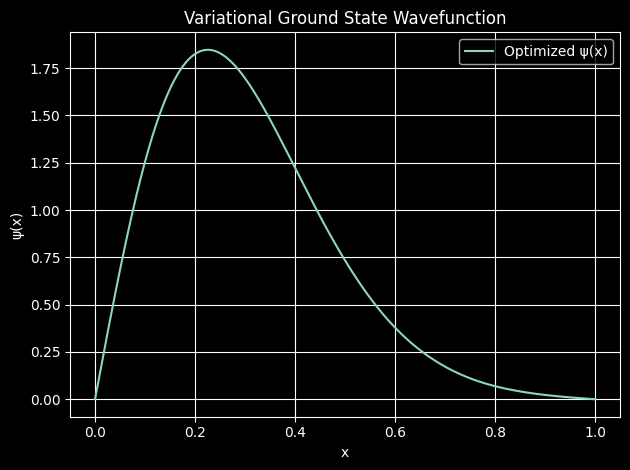

In [ ]:
#prof hint: H_alpha is a vector subspace we can span it w/ phi_n
#prof hint: alpha = (alpha_1, ..., alpha_n) will come from eigenvector of H
#units (natrual units)

class HamiltonianSolver:
    def __init__(self, hbar=1, m=1, a=1, N=10):
        self.hbar = hbar
        self.m = m
        self.a = a
        self.V0 = 100 * self.hbar**2 / (self.m * self.a**2)  #slope of linear potential, step size 50, so will put v0 at 100
        self.N = N  #size of basis (dim of H_alpha)

    #prof hint: {phi_i} i=1 to N forms the basis for H_alpha
    #prof hint: E_alpha = <phi_alpha|H|phi_alpha> / ||phi_alpha||^2 which we do when building H
    #define basis and hamiltonian terms.
    def phi(self, n, x):
        return np.sqrt(2 / self.a) * np.sin(n * np.pi * x / self.a)

    def V(self, x):
        return self.V0 * x / self.a

    def kinetic_energy(self, m_, n_):
        if m_ != n_:
            return 0
        return (n_ * np.pi)**2 * self.hbar**2 / (2 * self.m * self.a**2)

    def potential_energy(self, m_, n_):
        integrand = lambda x: self.phi(m_, x) * self.V(x) * self.phi(n_, x)
        result, _ = quad(integrand, 0, self.a)
        return result

    #build full H_{mn} matrix which is ke+pe contributions
    def build_hamiltonian(self):
        H = np.zeros((self.N, self.N))
        for m_ in range(1, self.N+1):
            for n_ in range(1, self.N+1):
                T = self.kinetic_energy(m_, n_)
                Vmn = self.potential_energy(m_, n_)
                H[m_-1, n_-1] = T + Vmn
        return H

    def solve(self):
        H = self.build_hamiltonian()
        #prof hint: alpha_0 is the eigenvector (α₁, ..., α_N) minimizing E_alpha
        #problem gave us exact energy, TODO make print: 39.9819
        eigenvalues, eigenvectors = eigh(H)
        ground_state_energy = eigenvalues[0]
        ground_state_vector = eigenvectors[:, 0] #this is alpha_0
        #prof hint: he told us a million times to check normalize, will dos o here.

        x_vals = np.linspace(0, self.a, 500)
        psi_vals = np.zeros_like(x_vals)

        for n in range(1, self.N+1):
            psi_vals += ground_state_vector[n-1] * self.phi(n, x_vals)

        #normalize
        norm = np.sqrt(np.trapezoid(np.abs(psi_vals)**2, x_vals))
        psi_vals /= norm

        #check norm = 1
        print('∫|ψ(x)|² dx ≈', np.trapezoid(np.abs(psi_vals)**2, x_vals))
        print('ground state energy is ',ground_state_energy-39.9819)

        #plot optimized variational ψ(x) v. x

        plt.plot(x_vals, psi_vals, label='Optimized ψ(x)')
        plt.title('Variational Ground State Wavefunction')
        plt.xlabel('x')
        plt.ylabel('ψ(x)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    solver = HamiltonianSolver()
    solver.solve()


In [ ]:
#BELOW IS OLD CODE BEFORE PYTHON FORMATTING/CLASS/FUNCTION POLISH: DEPRECIATED
#IGNORE, just not ready to delete yet until class functionality is built.
"""
#prof hint: H_alpha is a vector subspace we can span it w/ phi_n
#prof hint: alpha = (alpha_1, ..., alpha_n) will come from eigenvector of H
#units (natrual units)
hbar = 1
m = 1
a = 1
V0 = 100 * hbar**2 / (m * a**2)  #slope of linear potential, step size 50, so will put v0 at 100
N = 10  #size of basis (dim of H_alpha)
#prof hint: {phi_i} i=1 to N forms the basis for H_alpha
#prof hint: E_alpha = <phi_alpha|H|phi_alpha> / ||phi_alpha||^2 which we do when building H
#define basis and hamiltonian terms.

def phi(n, x):
    return np.sqrt(2 / a) * np.sin(n * np.pi * x / a)

def V(x):
    return V0 * x / a

def kinetic_energy(m_, n_):
    if m_ != n_:
        return 0
    return (n_ * np.pi)**2 * hbar**2 / (2 * m * a**2)

def potential_energy(m_, n_):
    integrand = lambda x: phi(m_, x) * V(x) * phi(n_, x)
    result, _ = quad(integrand, 0, a)
    return result
#build full H_{mn} matrix which is ke+pe contributions

H = np.zeros((N, N))
for m_ in range(1, N+1):
    for n_ in range(1, N+1):
        T = kinetic_energy(m_, n_)
        Vmn = potential_energy(m_, n_)
        H[m_-1, n_-1] = T + Vmn

#prof hint: alpha_0 is the eigenvector (α₁, ..., α_N) minimizing E_alpha
#our arg eigh returns eigenvalues in ascending order so we grab the first, thus the smollest

eigenvalues, eigenvectors = eigh(H)
ground_state_energy = eigenvalues[0]
ground_state_vector = eigenvectors[:, 0] #this is alpha_0
#prof hint: he told us a million times to check normalize, will dos o here.


x_vals = np.linspace(0, a, 500)
psi_vals = np.zeros_like(x_vals)

for n in range(1, N+1):
    psi_vals += ground_state_vector[n-1] * phi(n, x_vals)

#normalize
norm = np.sqrt(np.trapezoid(np.abs(psi_vals)**2, x_vals))
psi_vals /= norm

#check norm = 1
print('∫|ψ(x)|² dx ≈', np.trapezoid(np.abs(psi_vals)**2, x_vals))
#plot optimized variational ψ(x) v. x

plt.plot(x_vals, psi_vals, label='Optimized ψ(x)')
plt.title('Variational Ground State Wavefunction')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('optimized_wavefunction.png',dpi=600)
plt.show()
move_plots()
"""


"\n#prof hint: H_alpha is a vector subspace we can span it w/ phi_n\n#prof hint: alpha = (alpha_1, ..., alpha_n) will come from eigenvector of H\n#units (natrual units)\nhbar = 1\nm = 1\na = 1\nV0 = 100 * hbar**2 / (m * a**2)  #slope of linear potential, step size 50, so will put v0 at 100\nN = 10  #size of basis (dim of H_alpha)\n#prof hint: {phi_i} i=1 to N forms the basis for H_alpha\n#prof hint: E_alpha = <phi_alpha|H|phi_alpha> / ||phi_alpha||^2 which we do when building H\n#define basis and hamiltonian terms.\n\ndef phi(n, x):\n    return np.sqrt(2 / a) * np.sin(n * np.pi * x / a)\n\ndef V(x):\n    return V0 * x / a\n\ndef kinetic_energy(m_, n_):\n    if m_ != n_:\n        return 0\n    return (n_ * np.pi)**2 * hbar**2 / (2 * m * a**2)\n\ndef potential_energy(m_, n_):\n    integrand = lambda x: phi(m_, x) * V(x) * phi(n_, x)\n    result, _ = quad(integrand, 0, a)\n    return result\n#build full H_{mn} matrix which is ke+pe contributions\n\nH = np.zeros((N, N))\nfor m_ in range(1,